In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pyclustertend import hopkins 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
#Reading dataset
df=pd.read_csv("group12datav5.csv")
df.head()

,pat_number,date_announced,age,gender,state,outcome,age_group,source,outcome_1,gender_1,state_1,age_group_1,source_1
0,1.0,2020-01-30,20.0,F,Kerala,Recovered,middle,social,2,0,16,0,2
1,2.0,2020-02-02,6.0,M,Kerala,Recovered,youth,news,2,1,16,2,1
2,3.0,2020-03-02,50.0,M,Kerala,Recovered,middle,news,2,1,16,0,1
3,4.0,2020-02-03,45.0,M,Delhi,Recovered,middle,news,2,1,8,0,1
4,5.0,2020-02-03,24.0,M,Telangana,Recovered,middle,news,2,1,31,0,1


In [3]:
df.drop(["pat_number","date_announced","gender","state","outcome","age_group","source"],axis=1,inplace=True)

In [45]:
df.head()

,age,outcome_1,gender_1,state_1,age_group_1,source_1
0,20.0,2,0,16,0,2
1,6.0,2,1,16,2,1
2,50.0,2,1,16,0,1
3,45.0,2,1,8,0,1
4,24.0,2,1,31,0,1


In [4]:
df.describe()


,age,outcome_1,gender_1,state_1,age_group_1,source_1
count,99931.000000,99931.000000,99931.000000,99931.000000,99931.000000,99931.000000
mean,43.557785,1.129780,0.668471,20.004603,0.313726,1.201629
std,16.360573,0.420312,0.470914,9.913605,0.621534,0.993547
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,0.000000,13.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,19.000000,0.000000,2.000000
75%,50.000000,1.000000,1.000000,30.000000,0.000000,2.000000
max,99.000000,2.000000,2.000000,35.000000,2.000000,3.000000


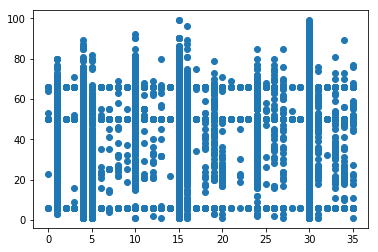

In [5]:
#Selecting State and age for attribute of interest
plt.scatter(df['state_1'],df['age'])

In [6]:
#Taking input as stage and age column
X=df.iloc[:,[3,0]].values
X

array([[16., 20.],
       [16.,  6.],
       [16., 50.],
       ...,
       [13., 50.],
       [28., 50.],
       [28., 50.]])

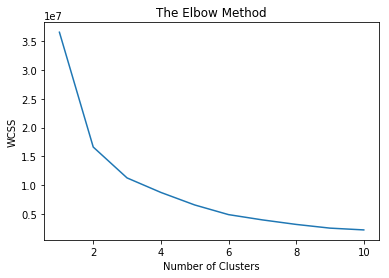

In [7]:
#Using the elbow method to find the optimal number of clusters
#random_state=42 is used in sklearn to produce the same results across a different run.
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
#Fitting K-Means to the dataset, taking no. of clusters as 3 since above curve has an elbow at value of 3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([1, 1, 0, ..., 0, 2, 2])

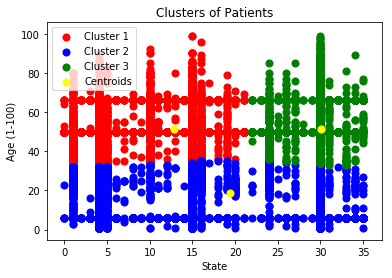

In [9]:
#Visualising the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('Clusters of Patients')
plt.xlabel('State')
plt.ylabel('Age (1-100)')
plt.legend()
plt.show()          

By above clustering, it is very different to interpret the clusters. Hence now we will try to use standard scalar, normalize and PCA functions for scaling and normalizing the data and reducing the dimesions within the data

# Using standard scalar, Normalize and PCA with dataset


In [10]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

C:\Users\Harshit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harshit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
print(scaled_df)

[[-1.43991919  2.07042359 -1.4195266  -0.40395229 -0.5047644   0.80356061]
 [-2.29563923  2.07042359  0.70401516 -0.40395229  2.7130986  -0.2029398 ]
 [ 0.39376661  2.07042359  0.70401516 -0.40395229 -0.5047644  -0.2029398 ]
 ...
 [ 0.39376661  2.07042359  0.70401516 -0.70656825 -0.5047644   0.80356061]
 [ 0.39376661  2.07042359  0.70401516  0.80651158 -0.5047644  -0.2029398 ]
 [ 0.39376661  2.07042359  0.70401516  0.80651158 -0.5047644  -0.2029398 ]]


In [12]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [13]:
print(normalized_df)

              0         1         2         3         4         5
0     -0.468685  0.673910 -0.462047 -0.131484 -0.164298  0.261554
1     -0.546929  0.493272  0.167730 -0.096240  0.646388 -0.048350
2      0.169505  0.891258  0.303058 -0.173890 -0.217287 -0.087360
3      0.034438  0.808834  0.275032 -0.473063 -0.197192 -0.079281
4     -0.429758  0.744320  0.253094  0.398733 -0.181463 -0.072957
5      0.519554  0.691721  0.235209  0.235752  0.368898 -0.067801
6      0.234747  0.694936 -0.476463 -0.304874  0.370613 -0.068117
7      0.257851  0.763333  0.259559 -0.334881  0.407089 -0.074821
8      0.234747  0.694936 -0.476463 -0.304874  0.370613 -0.068117
9      0.257851  0.763333  0.259559 -0.334881  0.407089 -0.074821
10     0.257851  0.763333  0.259559 -0.334881  0.407089 -0.074821
11     0.257851  0.763333  0.259559 -0.334881  0.407089 -0.074821
12     0.234747  0.694936 -0.476463 -0.304874  0.370613 -0.068117
13     0.257851  0.763333  0.259559 -0.334881  0.407089 -0.074821
14     0.2

In [35]:
# Reducing the dimensions of the data by using PCA
pca = PCA(n_components = 2) 
pca = pca.fit(normalized_df[[2,0]]) 
X_principal = pca.transform(normalized_df[[2,0]])
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(10)

,P1,P2
0,0.543434,0.463299
1,-0.077533,0.594222
2,-0.272625,-0.108296
3,-0.233340,0.023937
4,-0.172448,0.484644
5,-0.234450,-0.462810
6,0.498650,-0.238853
7,-0.236709,-0.199986
8,0.498650,-0.238853
9,-0.236709,-0.199986


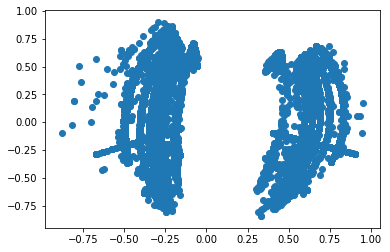

In [36]:
plt.scatter(X_principal['P1'], X_principal['P2'])

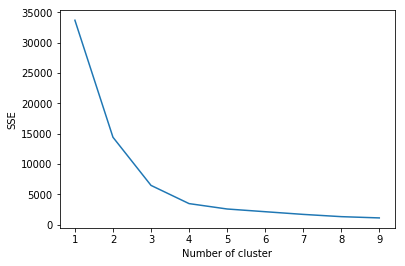

In [37]:
#Using the elbow method to find the optimal number of clusters
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [40]:
kmeans = KMeans(n_clusters=2)
y_kmeans=kmeans.fit(X_principal)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

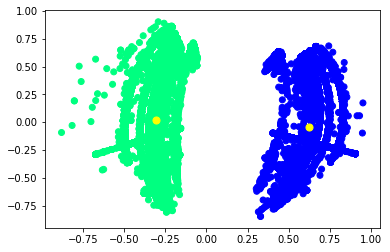

In [41]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')

plt.show() 

Here 2 clusters are formed. ( Male and Female) and Yellow point represents the centroids of the clusters

In [43]:
#Centroids x and y co-ordinates
kmeans.cluster_centers_


array([[-0.30854037,  0.02110623],
       [ 0.62192249, -0.04254368]])

In [44]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_principal, kmeans.labels_))

#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Since silhouette score is postive, we can say that objects is well matched to its own cluster and poorly matched to neighbouring clusters

0.5840534137311163
